# **Grapes to Greatness: Machine Learning in Wine Quality Prediction**

-- Sri Sai Ratna Abhishek Kosuri (21BCE7141)

In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/winequality-red.csv')

# Display the first few rows of the dataset to get an overview
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8 

In [15]:
data.shape

(1599, 12)

In [16]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("\nMissing values in the dataset:")
print(missing_values)


Missing values in the dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [17]:
# Summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(data.describe())


Summary statistics of the dataset:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


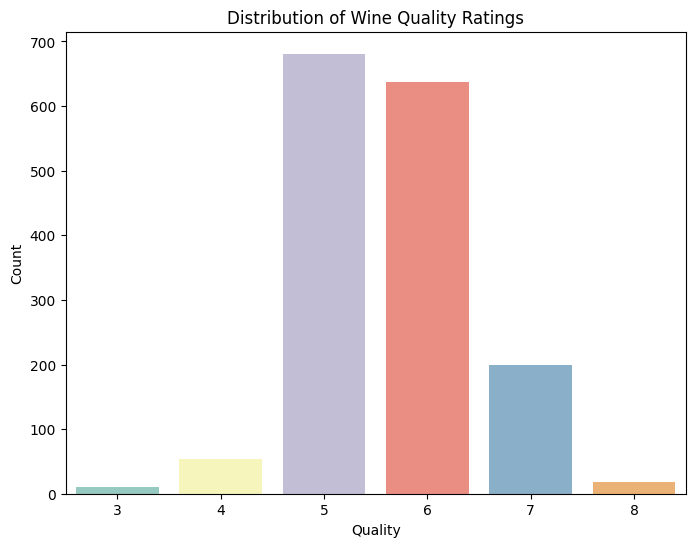

In [20]:
# Visualize the distribution of wine quality ratings
plt.figure(figsize=(8, 6))
sns.countplot(x="quality", data=data, palette="Set3")
plt.title("Distribution of Wine Quality Ratings")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

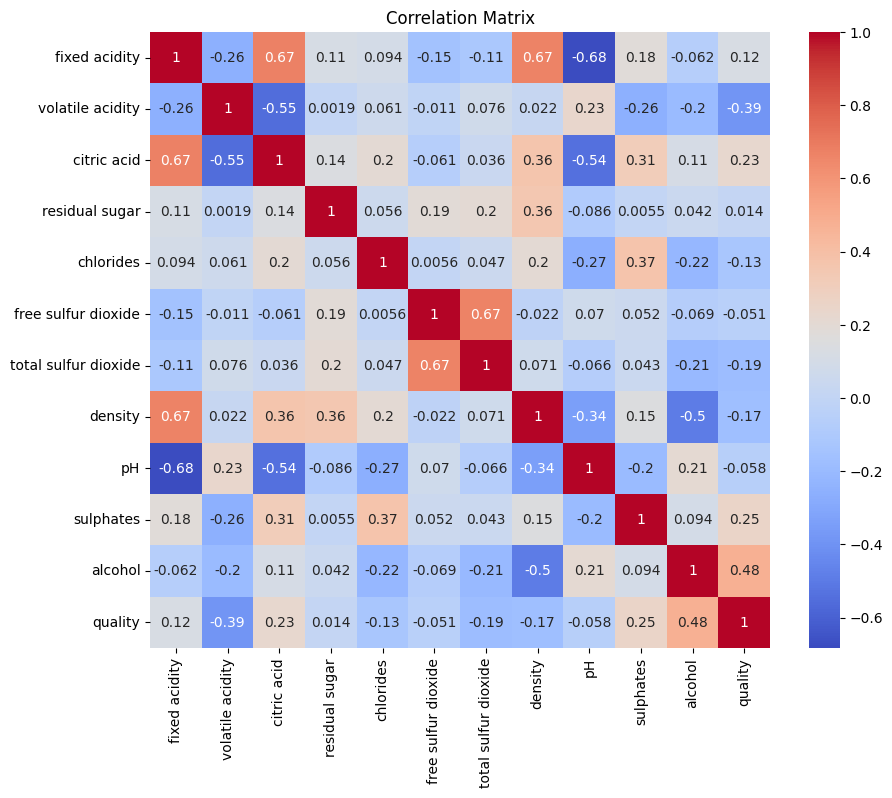

In [21]:
# Visualize the correlation matrix between features
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

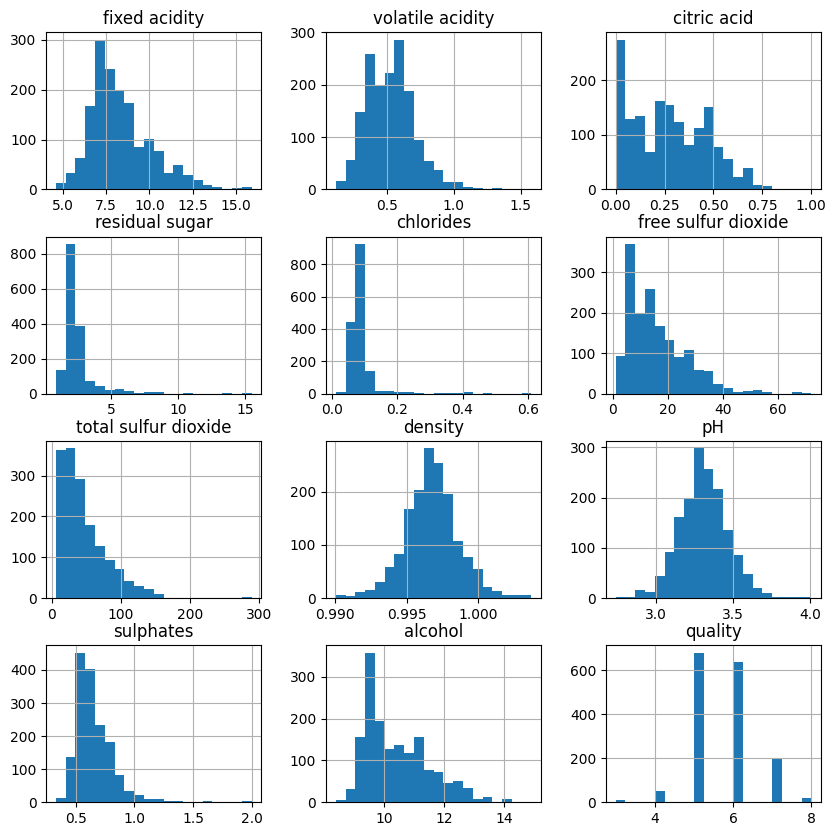

In [22]:
data.hist(bins=20, figsize=(10, 10))
plt.show()

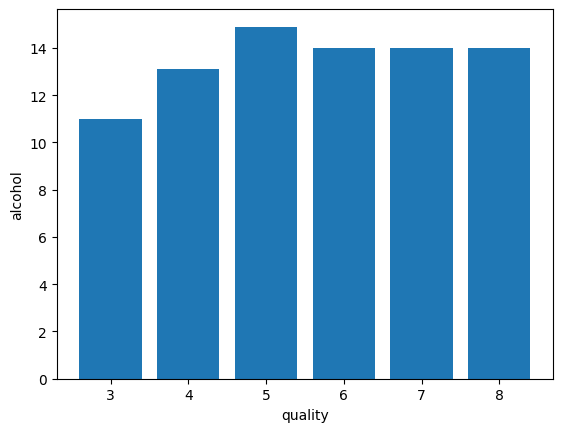

In [23]:
plt.bar(data['quality'], data['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

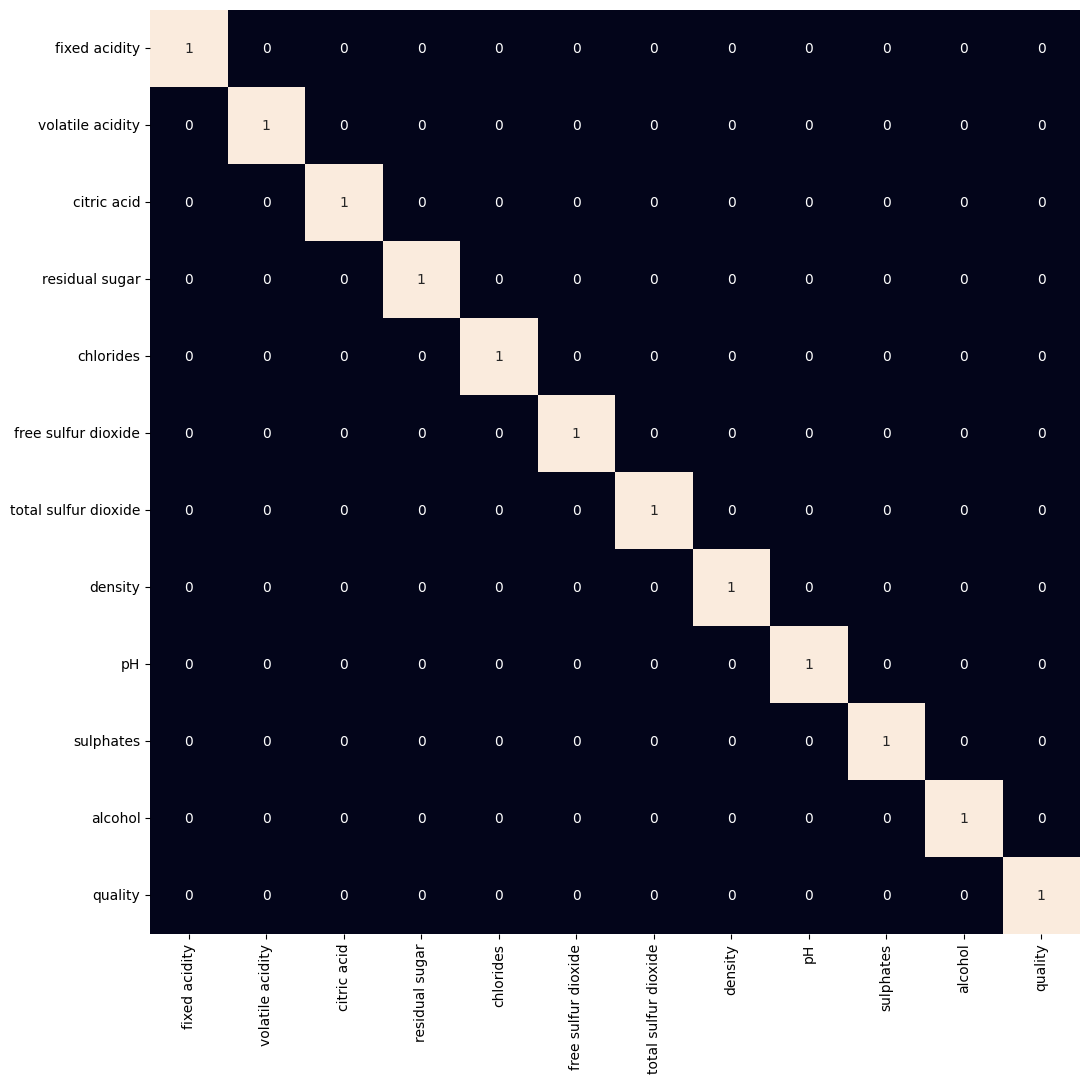

In [24]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [25]:
# Import necessary libraries for machine learning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

# Convert the quality variable to a categorical variable
data['quality'] = pd.cut(data['quality'], bins=[0, 4, 6, 8, 10], labels=[1, 2, 3, 4])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['quality']), data['quality'], test_size=0.2, random_state=42)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build machine learning models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each model
best_model = None
best_test_f1_score = 0
best_train_f1_score = 0
best_test_accuracy = 0
best_train_accuracy = 0

for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_test_pred = model.predict(X_test)

    # Calculate testing F1-score
    test_f1_score = f1_score(y_test, y_test_pred, average='weighted')

    # Calculate testing accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Make predictions on the training data
    y_train_pred = model.predict(X_train)

    # Calculate training F1-score
    train_f1_score = f1_score(y_train, y_train_pred, average='weighted')

    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)

    print(f"{model_name} Training F1-Score:", train_f1_score)
    print(f"{model_name} Testing F1-Score:", test_f1_score)
    print(f"{model_name} Training Accuracy:", train_accuracy)
    print(f"{model_name} Testing Accuracy:", test_accuracy)

    # Check if this model has the highest testing F1-score so far
    if test_f1_score > best_test_f1_score:
        best_test_f1_score = test_f1_score
        best_train_f1_score = train_f1_score
        best_model = model_name
        best_test_accuracy = test_accuracy
        best_train_accuracy = train_accuracy

# Display the best model based on testing F1-score and accuracy
print("\nBest Model:", best_model)
print("Best Training F1-Score:", best_train_f1_score)
print("Best Testing F1-Score:", best_test_f1_score)
print("Best Training Accuracy:", best_train_accuracy)
print("Best Testing Accuracy:", best_test_accuracy)

Logistic Regression Training F1-Score: 0.8175794667961407
Logistic Regression Testing F1-Score: 0.7927467735752619
Logistic Regression Training Accuracy: 0.8467552775605942
Logistic Regression Testing Accuracy: 0.828125
K-Nearest Neighbors Training F1-Score: 0.850977912836277
K-Nearest Neighbors Testing F1-Score: 0.8196386946386948
K-Nearest Neighbors Training Accuracy: 0.872556684910086
K-Nearest Neighbors Testing Accuracy: 0.84375
Naive Bayes Training F1-Score: 0.7906844518306405
Naive Bayes Testing F1-Score: 0.8113834715501463
Naive Bayes Training Accuracy: 0.7795152462861611
Naive Bayes Testing Accuracy: 0.803125
Decision Tree Training F1-Score: 1.0
Decision Tree Testing F1-Score: 0.8038985341141117
Decision Tree Training Accuracy: 1.0
Decision Tree Testing Accuracy: 0.796875
Random Forest Training F1-Score: 1.0
Random Forest Testing F1-Score: 0.8412490621827973
Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 0.8625

Best Model: Random Forest
Best Training F1-S